In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [252]:
FIGSIZE = (15,15)
TITLESIZE = 30

In [3]:
pu_summary = pd.read_hdf('~/Desktop/postCTD_pu.h5')

In [4]:
pu_summary

,pred_time,pred_sid,t_rec_energy,truthHitAssignedX,pred_energy_low_quantile,pred_id,truthHitAssignedZ,pred_energy_hits_raw,pred_dist,truthHitAssignedPhi,...,truthHitAssignedEta,truthHitAssignedEnergies,pred_energy_tracks_raw,pred_energy_high_quantile,pred_energy_unc,event_id,shower_type,particle,energy,pu
0,9.985320,0.0,18.615479,71.198036,0.0,1.0,340.579132,17.297405,1.0,-0.701746,...,1.981493,20.008057,19.996092,0.000000,0.000000,0,classic,electrons,20,0
0,9.989687,0.0,21.439873,-28.354321,0.0,1.0,332.520050,20.530512,1.0,-1.883290,...,1.968387,20.004810,20.225710,0.000000,0.000000,1,classic,electrons,20,0
0,9.993743,0.0,20.969240,74.388702,0.0,1.0,331.716675,20.244247,1.0,0.624294,...,1.971893,20.006310,19.777605,0.000000,0.000000,2,classic,electrons,20,0
0,9.987017,0.0,19.409647,24.638575,0.0,1.0,331.980530,18.720831,1.0,-1.298850,...,1.972193,20.007166,19.519520,0.000000,0.000000,3,classic,electrons,20,0
0,9.990565,0.0,19.007408,-31.733826,0.0,1.0,332.425537,18.295706,1.0,-1.922781,...,1.970083,19.991726,20.202286,0.000000,0.000000,4,classic,electrons,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9.993216,13.0,310.209747,-46.660801,0.0,3.0,402.952271,226.855072,1.0,2.009981,...,1.986554,249.994705,0.000000,0.160442,0.080221,95,hdbscan,kaons,250,200
0,9.974798,24.0,272.470093,63.502682,0.0,3.0,357.089081,149.721817,1.0,-0.856247,...,1.990014,249.998764,8.637396,0.166466,0.083233,96,hdbscan,kaons,250,200
0,9.978690,13.0,344.839294,104.556786,0.0,3.0,388.167389,231.119949,1.0,-0.174532,...,1.982262,249.998688,18.454872,0.058221,0.029111,97,hdbscan,kaons,250,200
0,9.980190,26.0,259.246948,16.736366,0.0,3.0,357.539246,189.937027,1.0,-1.399059,...,1.980829,250.008865,7.128349,0.077781,0.038890,98,hdbscan,kaons,250,200


In [47]:
def get_efficiencies(summary, particle, pu, type='hdbscan'):
    summary = summary[ summary['particle'] == particle ]
    summary = summary[ summary['pu'] == pu ]
    summary = summary[ summary['shower_type'] == type ]
    if summary.empty:
        print(f"ValueError('No data for particle {particle} and pu {pu} and type {type}'.format(particle, pu, type))")
        return None, None, None
    energies = summary['energy'].unique()
    efficiencies = []
    for energy in energies:
        tmp = summary[ summary['energy'] == energy ]
        efficiency = tmp.dropna().shape[0] / tmp.shape[0]
        efficiencies.append(efficiency)

    energies = np.array(energies)
    efficiencies = np.array(efficiencies)
    efficiency_errors = np.sqrt(efficiencies * (1 - efficiencies) / summary.shape[0])

    return energies, efficiencies, efficiency_errors


array([ 20,  50,  75, 100, 125, 150])

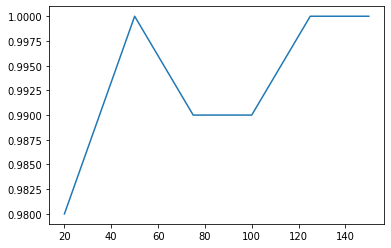

In [24]:
energies, efficiencies, errors = get_efficiencies(pu_summary, 'electrons', 200)
plt.plot(energies, efficiencies, label='electron, 0 PU')
energies

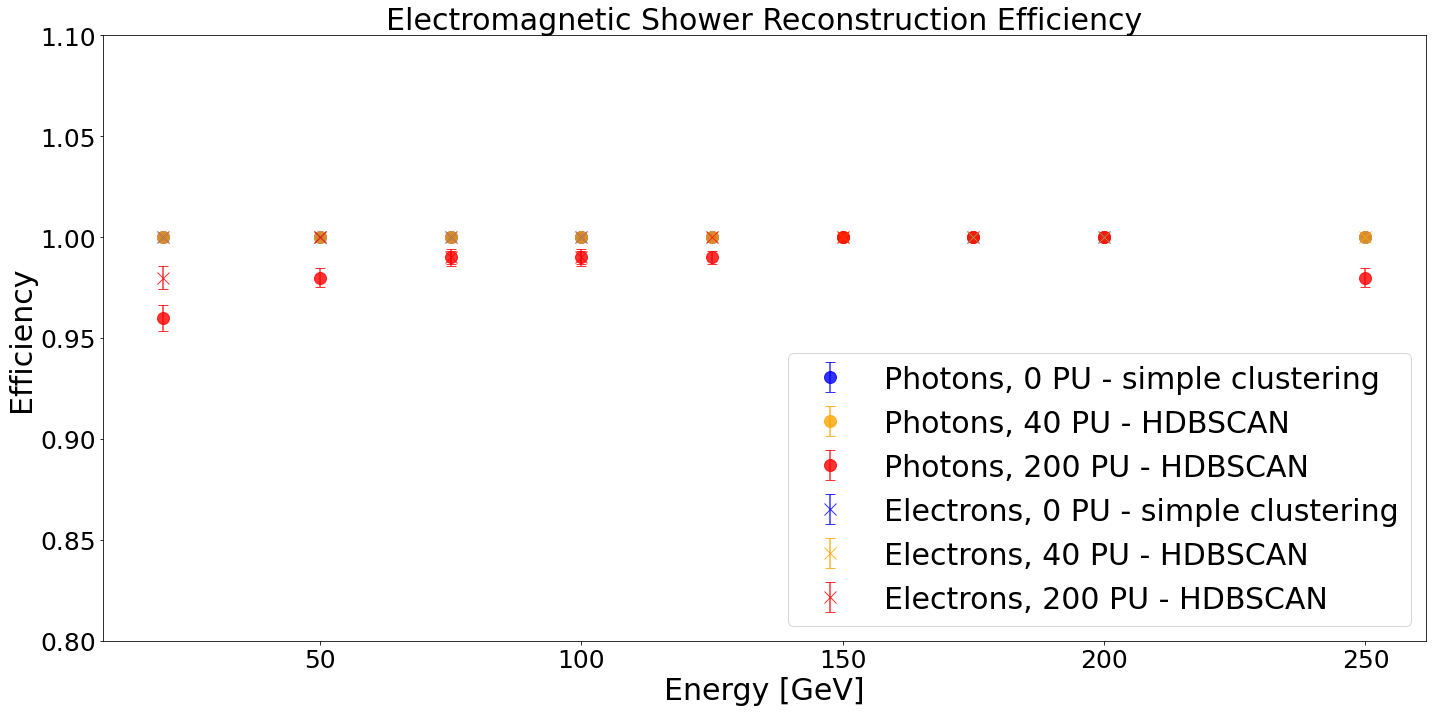

In [72]:
fig, ax = plt.subplots(figsize=FIGSIZE)

ax.set_title("Electromagnetic Shower Reconstruction Efficiency", fontsize=TITLESIZE)

e_gamma_0, eff_gamma_0, err_gamma_0 = get_efficiencies(pu_summary, 'photons', 0, type='classic')
e_gamma_40, eff_gamma_40, err_gamma_40 = get_efficiencies(pu_summary, 'photons', 40)
e_gamma_200, eff_gamma_200, err_gamma_200 = get_efficiencies(pu_summary, 'photons', 200)
e_electron_0, eff_electron_0, err_electron_0 = get_efficiencies(pu_summary, 'electrons', 0, type='classic')
e_electron_40, eff_electron_40, err_electron_40 = get_efficiencies(pu_summary, 'electrons', 40)
e_electron_200, eff_electron_200, err_electron_200 = get_efficiencies(pu_summary, 'electrons', 200)

if e_gamma_0 is not None:
    ax.errorbar(e_gamma_0, eff_gamma_0, yerr=err_gamma_0, label='Photons, 0 PU - simple clustering',
                marker='o', color='blue', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_gamma_40 is not None:
    ax.errorbar(e_gamma_40, eff_gamma_40, yerr=err_gamma_40, label='Photons, 40 PU - HDBSCAN',
                marker='o', color='orange', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_gamma_200 is not None:
    ax.errorbar(e_gamma_200, eff_gamma_200, yerr=err_gamma_200, label='Photons, 200 PU - HDBSCAN',
                marker='o', color='red', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_electron_0 is not None:
    ax.errorbar(e_electron_0, eff_electron_0, yerr=err_electron_0, label='Electrons, 0 PU - simple clustering',
                marker='x', color='blue', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_electron_40 is not None:
    ax.errorbar(e_electron_40, eff_electron_40, yerr=err_electron_40, label='Electrons, 40 PU - HDBSCAN',
                marker='x', color='orange', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_electron_200 is not None:
    ax.errorbar(e_electron_200, eff_electron_200, yerr=err_electron_200, label='Electrons, 200 PU - HDBSCAN',
                marker='x', color='red', markersize=12, linestyle='none', capsize=5, alpha=0.8)

ax.set_xlabel('Energy [GeV]', fontsize=30)
ax.set_ylabel('Efficiency', fontsize=30)
ax.legend(loc='lower right', fontsize=30)
ax.set_ylim(0.8, 1.1)
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
# make ticklabels larger
ax.tick_params(axis='both', which='major', labelsize=25)
fig.tight_layout()


plt.show()




ValueError('No data for particle pions and pu 40 and type hdbscan'.format(particle, pu, type))


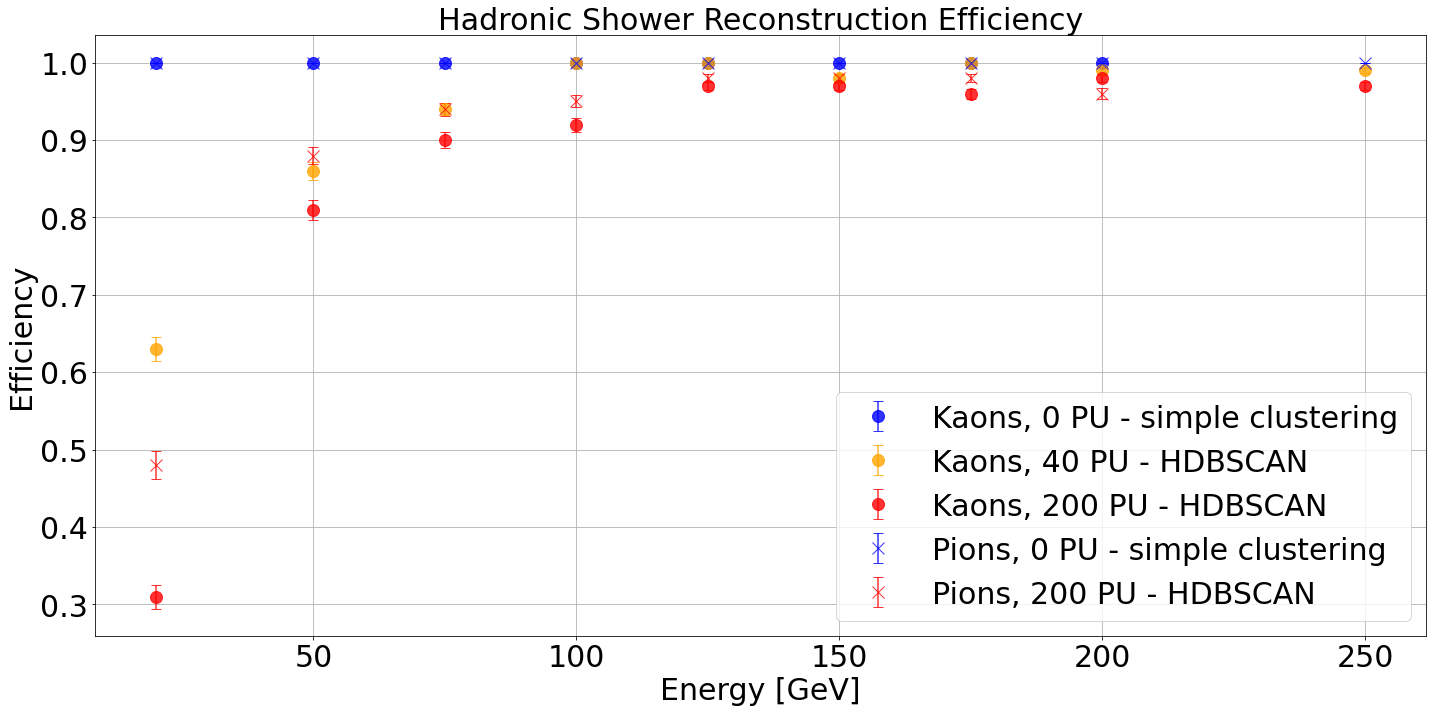

In [73]:
# Hadronic Shower Reconstruction Efficiency

fig, ax = plt.subplots(figsize=FIGSIZE)

ax.set_title("Hadronic Shower Reconstruction Efficiency", fontsize=TITLESIZE)

e_kaons_0, eff_kaons_0, err_kaons_0 = get_efficiencies(pu_summary, 'kaons', 0, type='classic')
e_kaons_40, eff_kaons_40, err_kaons_40 = get_efficiencies(pu_summary, 'kaons', 40, type='hdbscan')
e_kaons_200, eff_kaons_200, err_kaons_200 = get_efficiencies(pu_summary, 'kaons', 200, type='hdbscan')
e_pions_0, eff_pions_0, err_pions_0 = get_efficiencies(pu_summary, 'pions', 0, type='classic')
e_pions_40, eff_pions_40, err_pions_40 = get_efficiencies(pu_summary, 'pions', 40, type='hdbscan')
e_pions_200, eff_pions_200, err_pions_200 = get_efficiencies(pu_summary, 'pions', 200, type='hdbscan')

if e_kaons_0 is not None:
    ax.errorbar(e_kaons_0, eff_kaons_0, yerr=err_kaons_0, label='Kaons, 0 PU - simple clustering',
                marker='o', color='blue', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_kaons_40 is not None:
    ax.errorbar(e_kaons_40, eff_kaons_40, yerr=err_kaons_40, label='Kaons, 40 PU - HDBSCAN',
                marker='o', color='orange', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_kaons_200 is not None:
    ax.errorbar(e_kaons_200, eff_kaons_200, yerr=err_kaons_200, label='Kaons, 200 PU - HDBSCAN',
                marker='o', color='red', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_pions_0 is not None:
    ax.errorbar(e_pions_0, eff_pions_0, yerr=err_pions_0, label='Pions, 0 PU - simple clustering',
                marker='x', color='blue', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_pions_40 is not None:
    ax.errorbar(e_pions_40, eff_pions_40, yerr=err_pions_40, label='Pions, 40 PU - HDBSCAN',
                marker='x', color='orange', markersize=12, linestyle='none', capsize=5, alpha=0.8)
if e_pions_200 is not None:
    ax.errorbar(e_pions_200, eff_pions_200, yerr=err_pions_200, label='Pions, 200 PU - HDBSCAN',
                marker='x', color='red', markersize=12, linestyle='none', capsize=5, alpha=0.8)


ax.set_xlabel('Energy [GeV]', fontsize=30)
ax.set_ylabel('Efficiency', fontsize=30)
ax.legend(loc='lower right', fontsize=30)
# ax.set_ylim(0.8, 1.1)
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
# make ticklabels larger
ax.tick_params(axis='both', which='major', labelsize=30)
# add a second x-axis
# ax2 = ax.twiny()
# ax2.set_xlabel('Transverse Momentum [GeV]', fontsize=30)
# set xticks at same position as for energy
ax.grid()
fig.tight_layout()

plt.show()

[50, 100, 150, 200]


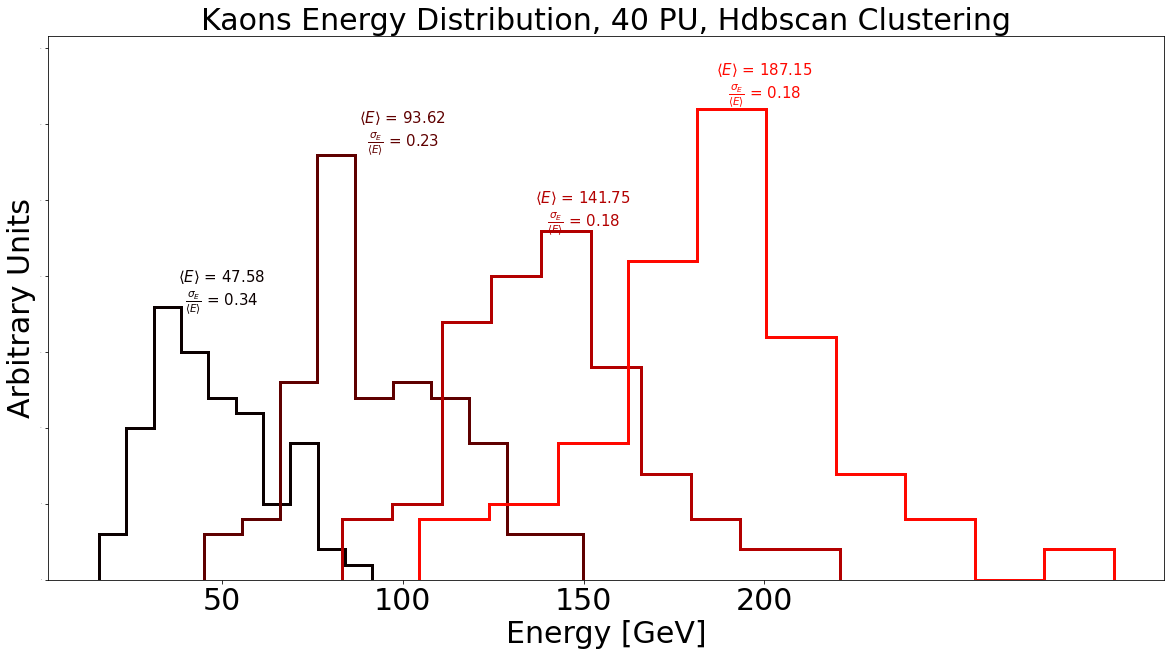

In [153]:
def energy_distributions(summary, particle, pu, type='hdbscan', energies = None):
    fig, ax = plt.subplots(figsize=FIGSIZE)
    filtered = summary[ (summary['particle'] == particle) & (summary['pu'] == pu) & (summary['shower_type'] == type) ]
    if energies is None:
        energies = filtered['energy'].unique()
    # get hot color map
    cmap = plt.get_cmap('hot')
    # get number of energies
    n = len(energies)
    # get n different colors from cmap
    colors = [cmap(0.5*i/n) for i in range(n)]
    print(energies)
    for i, energy in enumerate(energies):
        tmp = filtered[ filtered['energy'] == energy ].dropna()
        e = tmp['pred_energy_hits_corrected']
        n_hist, bins, patches = ax.hist(e, bins=10, histtype='step', color=colors[i], lw=3., label=f'{energy} GeV')
        response = e.mean()
        resolution = e.std() / response
        # add text at x-position of energy
        string_E = r"$\langle E \rangle$"
        string_res= r"$\frac{\sigma_E}{\langle E \rangle}$"
        ax.text(energy, 1.05 * np.max(n_hist),
                string_E + f' = {response:.2f} \n' + string_res + f' = {resolution:.2f}',
                fontsize=15, ha='center', va='center', color=colors[i])


    ax.set_title(f'{particle.capitalize()} Energy Distribution, {pu} PU, {type.capitalize()} Clustering', fontsize=TITLESIZE)
    ax.set_xticks(energies)
    ax.tick_params(axis='x', which='major', labelsize=30)
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.set_xlabel('Energy [GeV]', fontsize=30)
    ax.set_ylabel('Arbitrary Units', fontsize=30)
    ax.set_ylim(0, 1.1 * ax.get_ylim()[1])

    return fig, ax


fig, ax = energy_distributions(pu_summary, 'kaons', 40, type='hdbscan', energies = [50, 100, 150, 200])
plt.show()

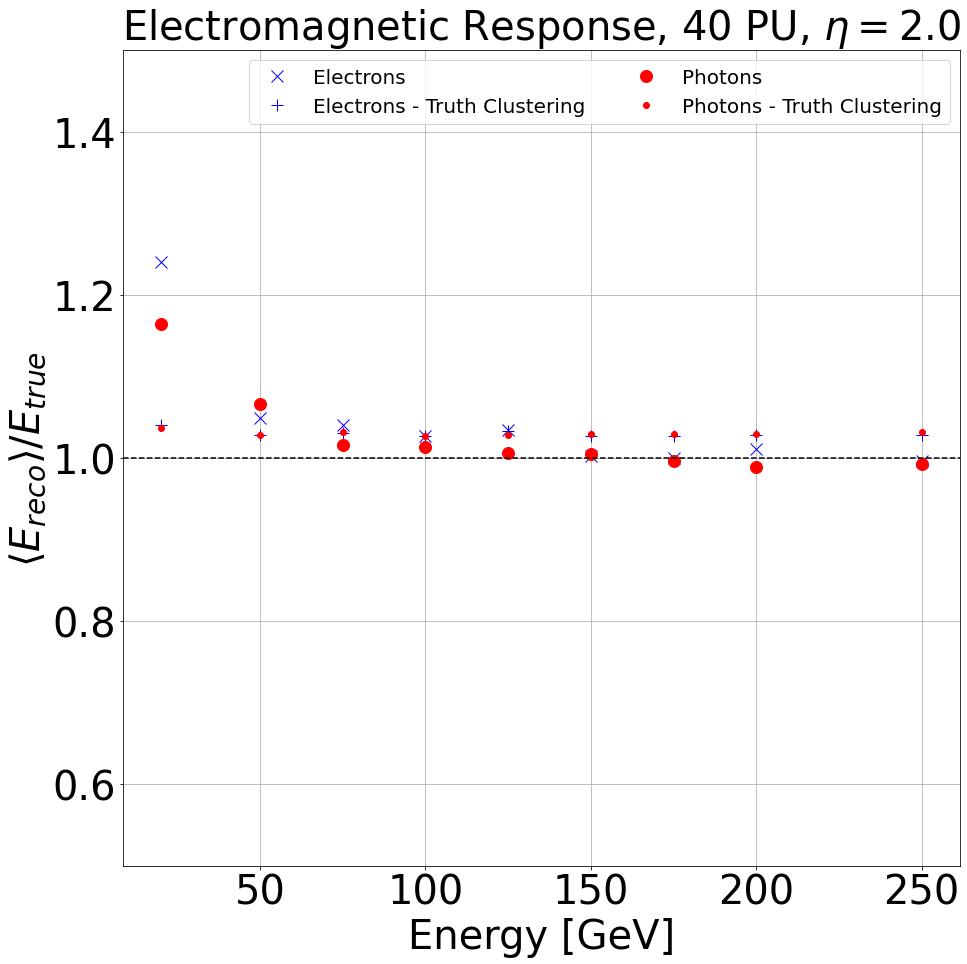

In [258]:
def energy_resolution_function(E, a, b, c):
    return np.sqrt(a**2 / E + b**2 / E**2 + c**2 )

from scipy.optimize import curve_fit
from scipy.stats import norm


def response_resolution(summary, EM, RESPONSE=True, pus=[0, 40, 200]):
    if RESPONSE:
        data_type = "Response"
        ylabel = r"$\langle E_{reco} \rangle / E_{true}$"
    else:
        data_type = "Resolution"
        ylabel = r"$\frac{\sigma_{E_{reco}}}{\langle E_{reco} \rangle}$"
    if EM:
        particle_charged, particle_neutral = 'electrons', 'photons'
        shower_type = "Electromagnetic"
    else:
        particle_charged, particle_neutral = 'pions', 'kaons'
        shower_type = "Hadronic"

    fig, ax = plt.subplots(figsize=FIGSIZE)
    dataframes = []
    if 0 in pus:
        filtered_charged_0 = summary[ (summary['particle'] == particle_charged) & (summary['pu'] == 0) & (summary['shower_type'] == 'classic') ]
        filtered_neutral_0 = summary[ (summary['particle'] == particle_neutral) & (summary['pu'] == 0) & (summary['shower_type'] == 'classic') ]
        dataframes.append(filtered_charged_0)
        dataframes.append(filtered_neutral_0)
    if 40 in pus:
        filtered_charged_40 = summary[ (summary['particle'] == particle_charged) & (summary['pu'] == 40) & (summary['shower_type'] == 'hdbscan') ]
        filtered_neutral_40 = summary[ (summary['particle'] == particle_neutral) & (summary['pu'] == 40) & (summary['shower_type'] == 'hdbscan') ]
        dataframes.append(filtered_charged_40)
        dataframes.append(filtered_neutral_40)
    if 200 in pus:
        filtered_charged_200 = summary[ (summary['particle'] == particle_charged) & (summary['pu'] == 200) & (summary['shower_type'] == 'hdbscan') ]
        filtered_neutral_200 = summary[ (summary['particle'] == particle_neutral) & (summary['pu'] == 200) & (summary['shower_type'] == 'hdbscan') ]
        dataframes.append(filtered_charged_200)
        dataframes.append(filtered_neutral_200)
    # get hot color map
    for i, df in enumerate(dataframes):
        df = df.dropna()
        if df.empty: continue
        particle = df['particle'].unique()[0]
        pu = df['pu'].unique()[0]
        if particle in ['electrons', 'pions']:
            marker = 'x'
            marker_base = '+'
            color = 'blue'
            fitstyle = '--'
        elif particle in ['photons', 'kaons']:
            marker = 'o'
            marker_base = '.'
            color = 'red'
            fitstyle = '.-'
        # if pu == 0: color = 'blue'
        # elif pu == 40: color = 'orange'
        # elif pu == 200: color = 'red'

        responses = []
        resolutions = []
        responses_base = []
        resolutions_base = []
        energies = df['energy'].unique()
        for e in energies:
            tmp = df[ df['energy'] == e ]
            tmp_e = tmp['pred_energy_hits_corrected']
            e_baseline = tmp['t_rec_energy']
            # fit Gaussian to tmp_e

            mu, sigma = norm.fit(tmp_e)
            mu_base, sigma_base = norm.fit(e_baseline)
            # response = tmp_e.mean()
            response = mu / e
            response_base = mu_base / e
            resolution = sigma / mu
            resolution_base = sigma_base / mu_base
            responses.append(response)
            resolutions.append(resolution)
            responses_base.append(response_base)
            resolutions_base.append(resolution_base)
        responses = np.array(responses)
        resolutions = np.array(resolutions)
        if RESPONSE:
            data = responses
            data_base = responses_base
        else:
            data = resolutions
            data_base = resolutions_base
            # fit energy resolution function
            popt, pcov = curve_fit(energy_resolution_function, energies, data, p0=[0.1, 0.1, 0.1])
            popt_base, pcov_base = curve_fit(energy_resolution_function, energies, data_base, p0=[0.1, 0.1, 0.1])
            # plot fit
            energies_fit = np.linspace(energies[0], energies[-1], 100)

        ax.plot(energies, data, marker=marker, color=color, markersize=12, linestyle='none',
                label=f'{particle.capitalize()}')
        if not RESPONSE:
            fitlabel = r"$\frac{\sigma_E}{\langle E \rangle} = \sqrt{\frac{a^2}{E} + \frac{b^2}{E^2} + c^2}$"
            fit_a = f"{np.abs(popt[0]):.2f}"
            fit_b = f"{np.abs(popt[1]):.2f}"
            fit_c = f"{np.abs(popt[2]):.2f}"
            ax.plot(energies_fit, energy_resolution_function(energies_fit, *popt),
                    color=color, ls='--', lw=2., alpha=0.8,
                    label = fitlabel + "\nFit: a = " + fit_a + "; b = " + fit_b + "; c = " + fit_c)
        ax.plot(energies, data_base, marker=marker_base, color=color, markersize=12, linestyle='none',
                label=f'{particle.capitalize()} - Truth Clustering')
        if not RESPONSE:
            fit_a_base = f"{np.abs(popt_base[0]):.2f}"
            fit_b_base = f"{np.abs(popt_base[1]):.2f}"
            fit_c_base = f"{np.abs(popt_base[2]):.2f}"
            ax.plot(energies_fit, energy_resolution_function(energies_fit, *popt_base),
                    color=color, ls='-.', lw=2., alpha=0.8,
                    label = fitlabel + "\nFit: a = " + fit_a_base + "; b = " + fit_b_base + "; c = " + fit_c_base)


    # add horizontal dashed line at 1.0
    if RESPONSE:
        ax.axhline(1.0, color='black', linestyle='--')
        ax.set_ylim((0.5, 1.5))
    else:
        ymax = 0.3 if EM else 0.6
        ax.set_ylim(0, ymax)
    ax.legend(fontsize=20, ncol=2)
    title = f"{shower_type} {data_type}"
    if len(pus) != 3:
        title += f", {pus[0]} PU"
    title += r", $\eta = 2.0$"

    ax.set_title(title, fontsize=40)
    ax.set_xlabel('Energy [GeV]', fontsize=40)
    ax.set_ylabel(ylabel, fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    ax.grid()

    return fig, ax


fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=True, pus=[40])
plt.show()

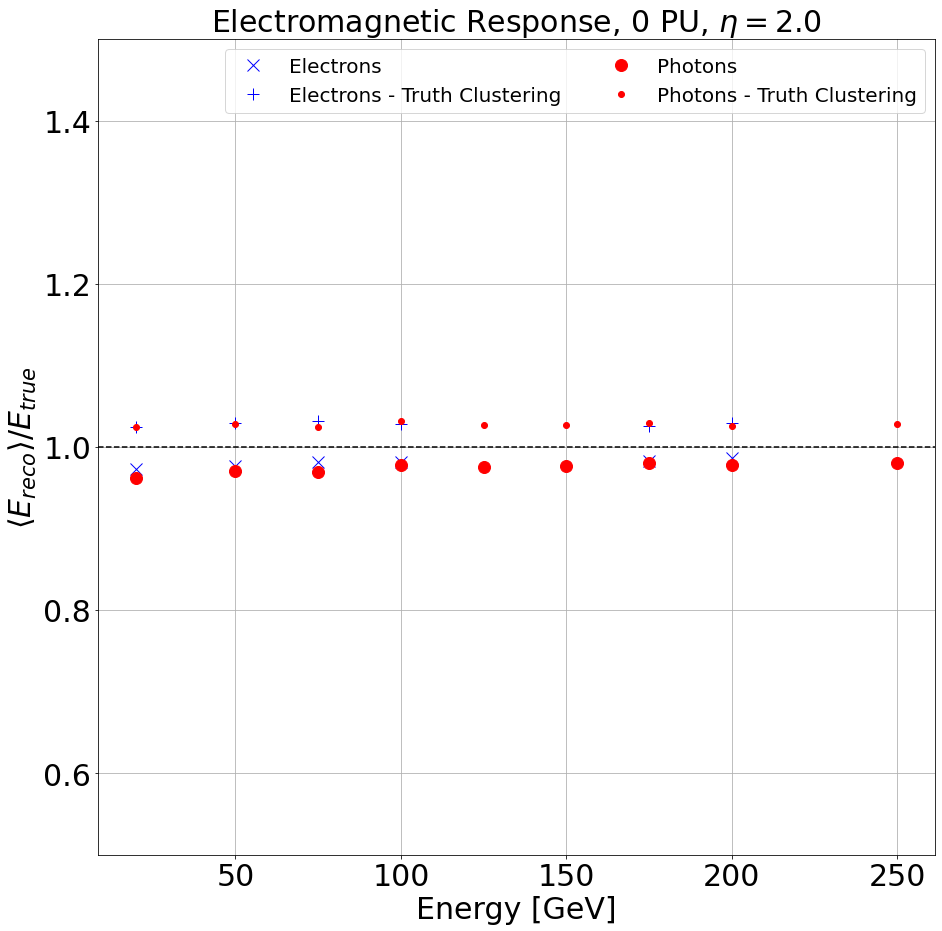

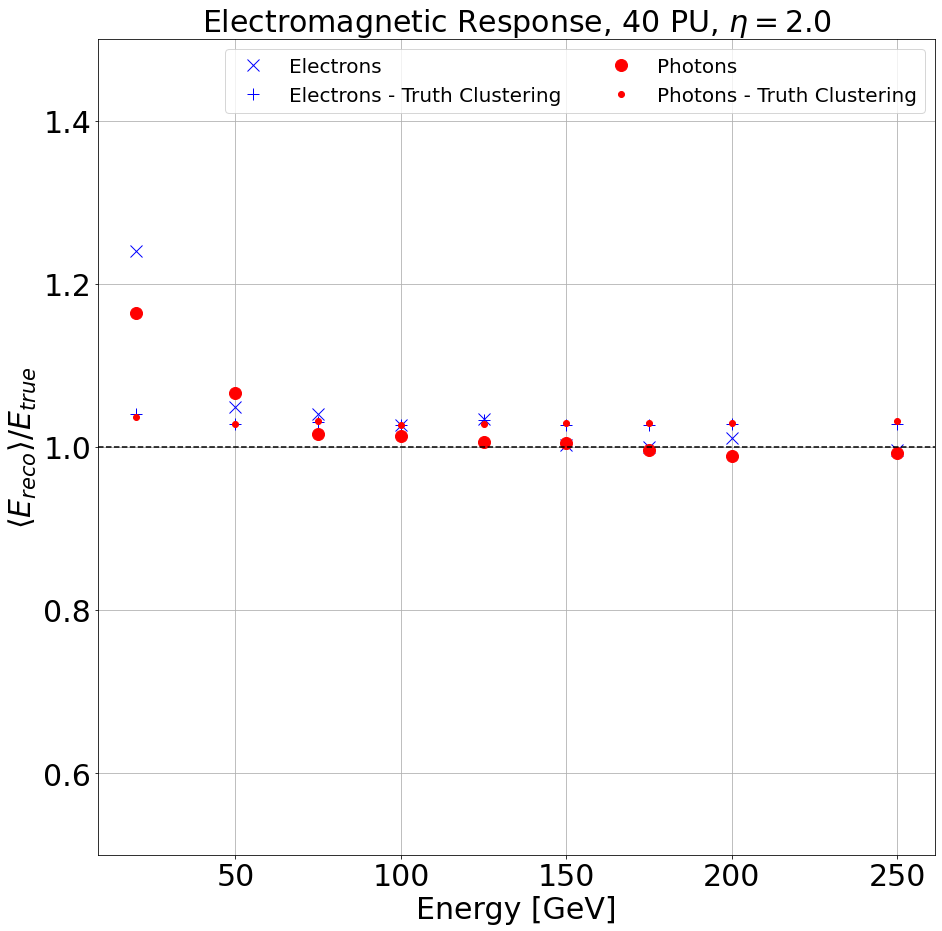

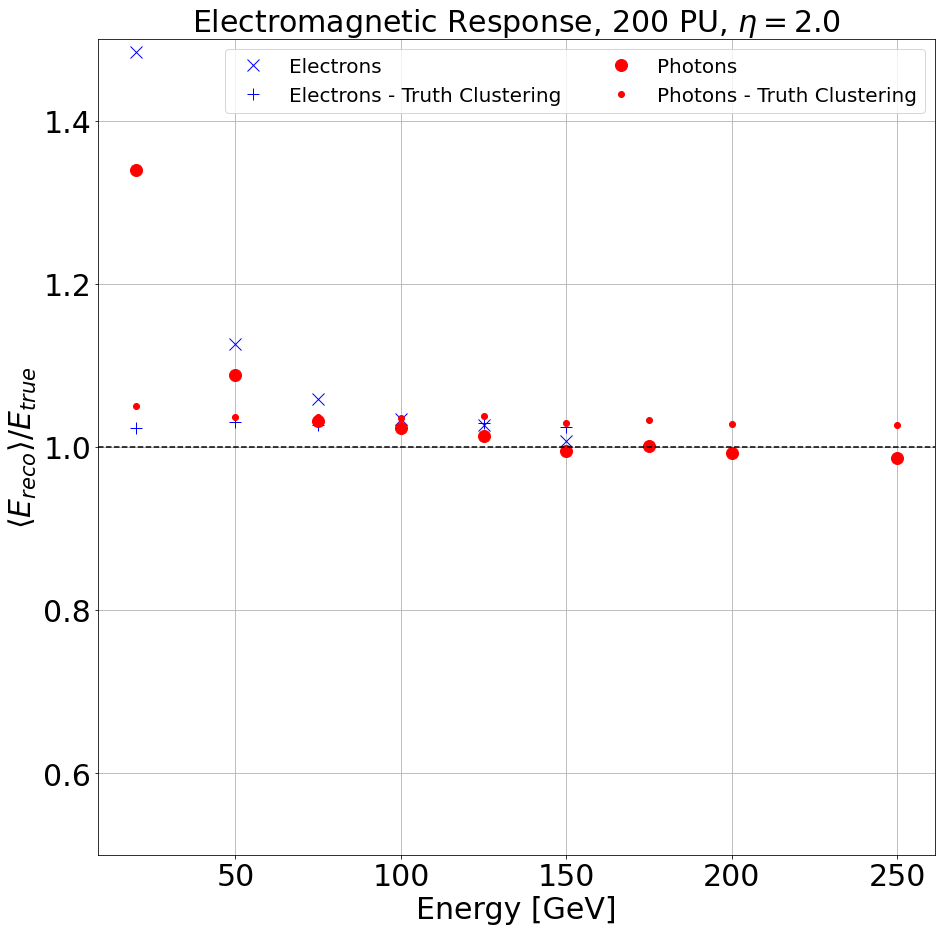

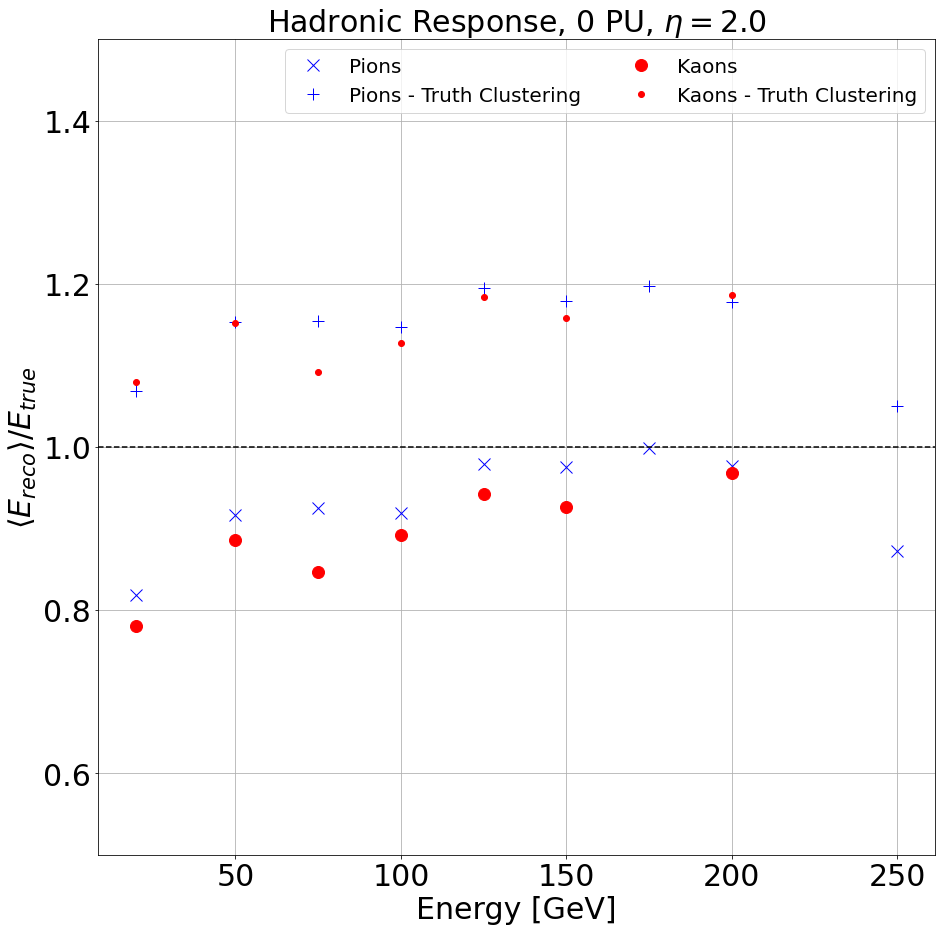

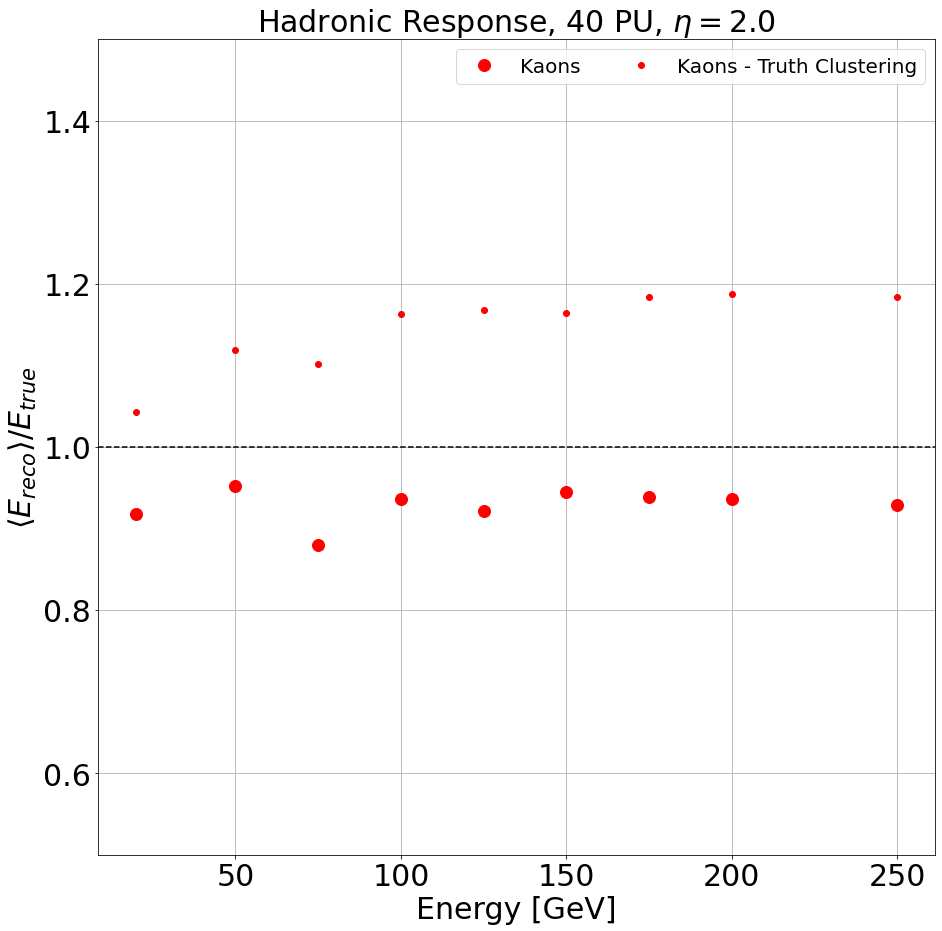

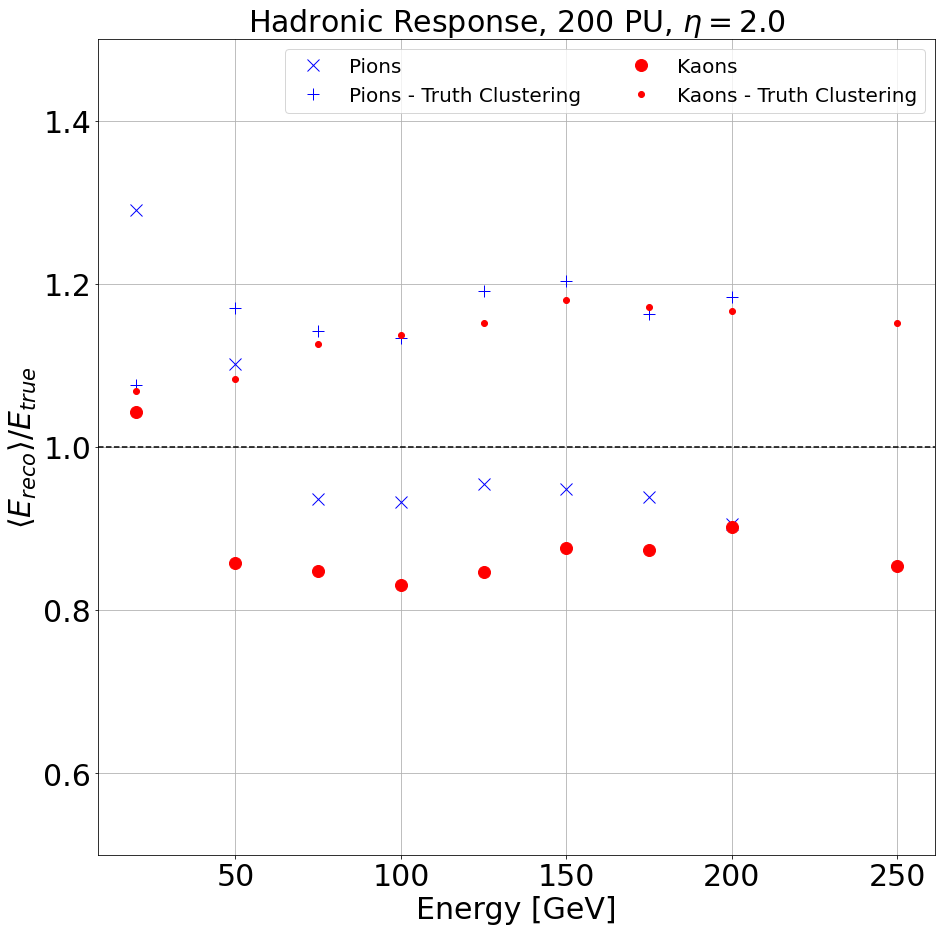

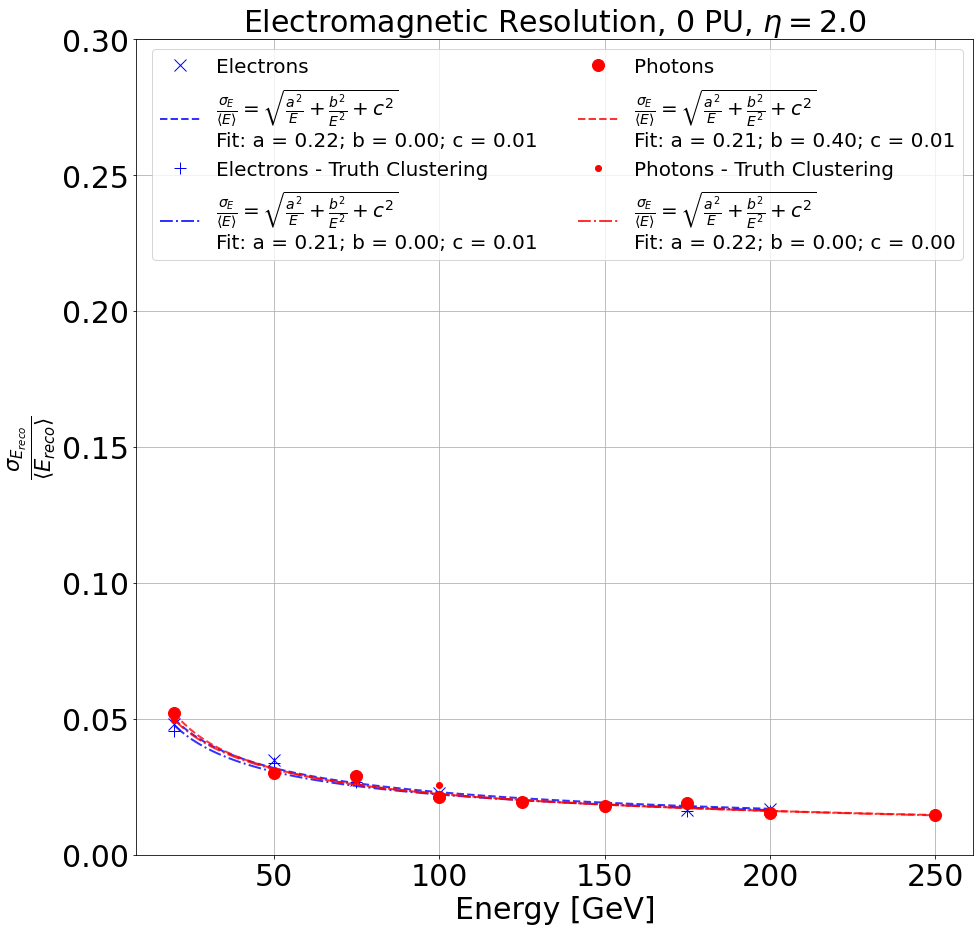

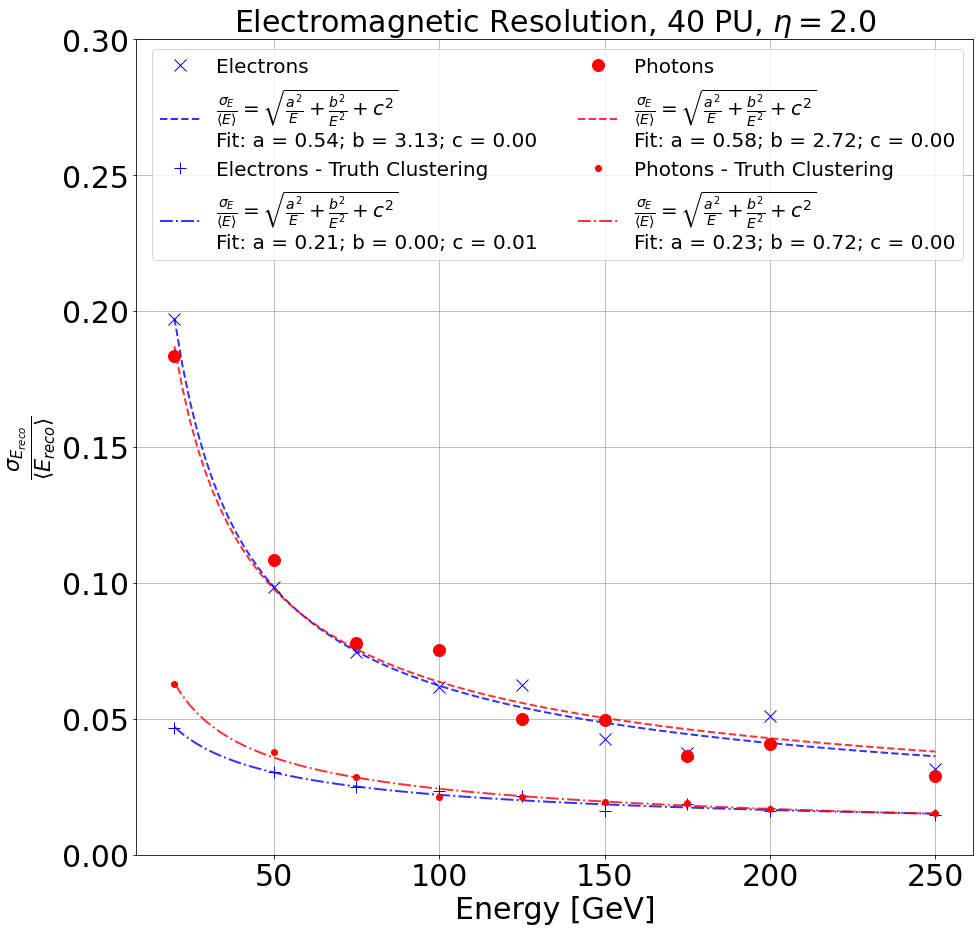

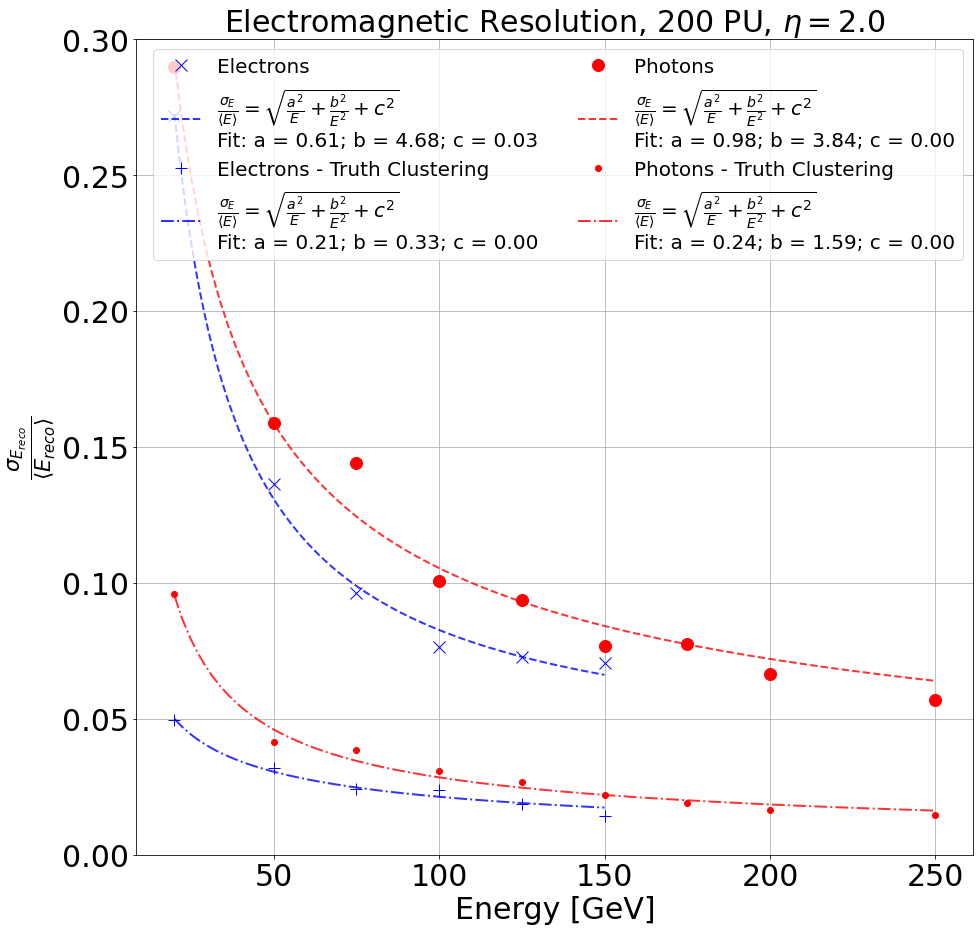

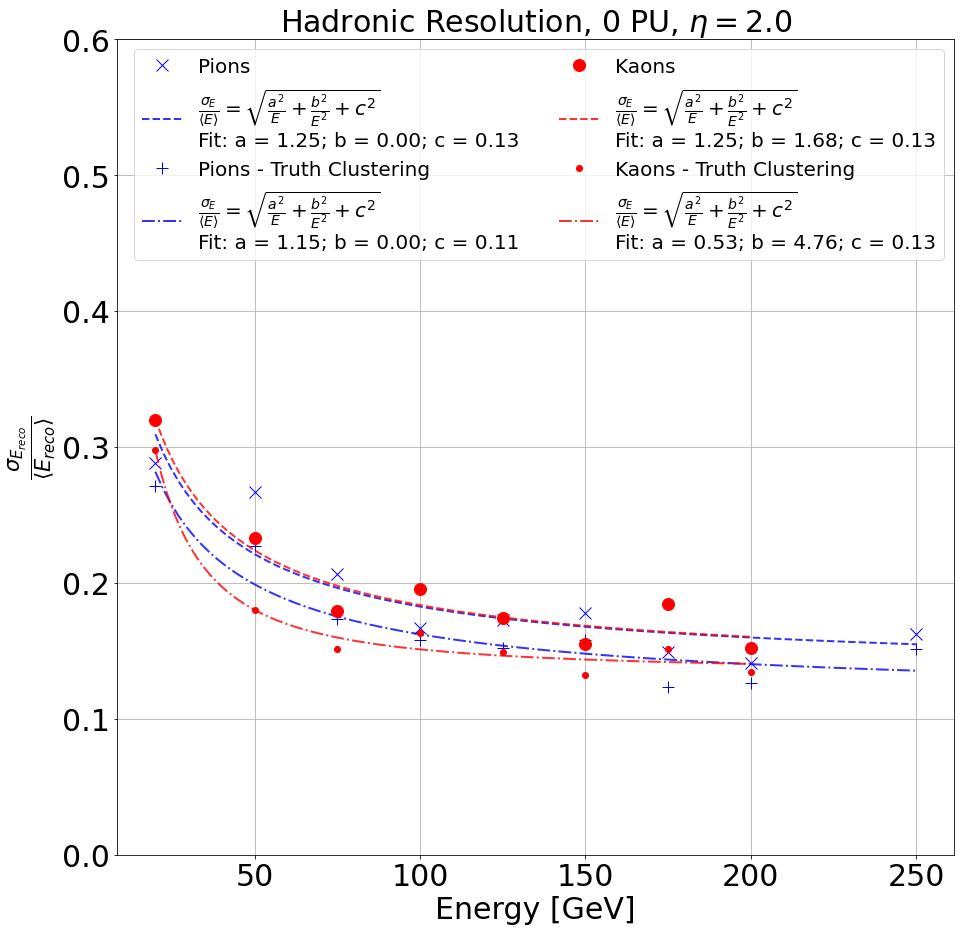

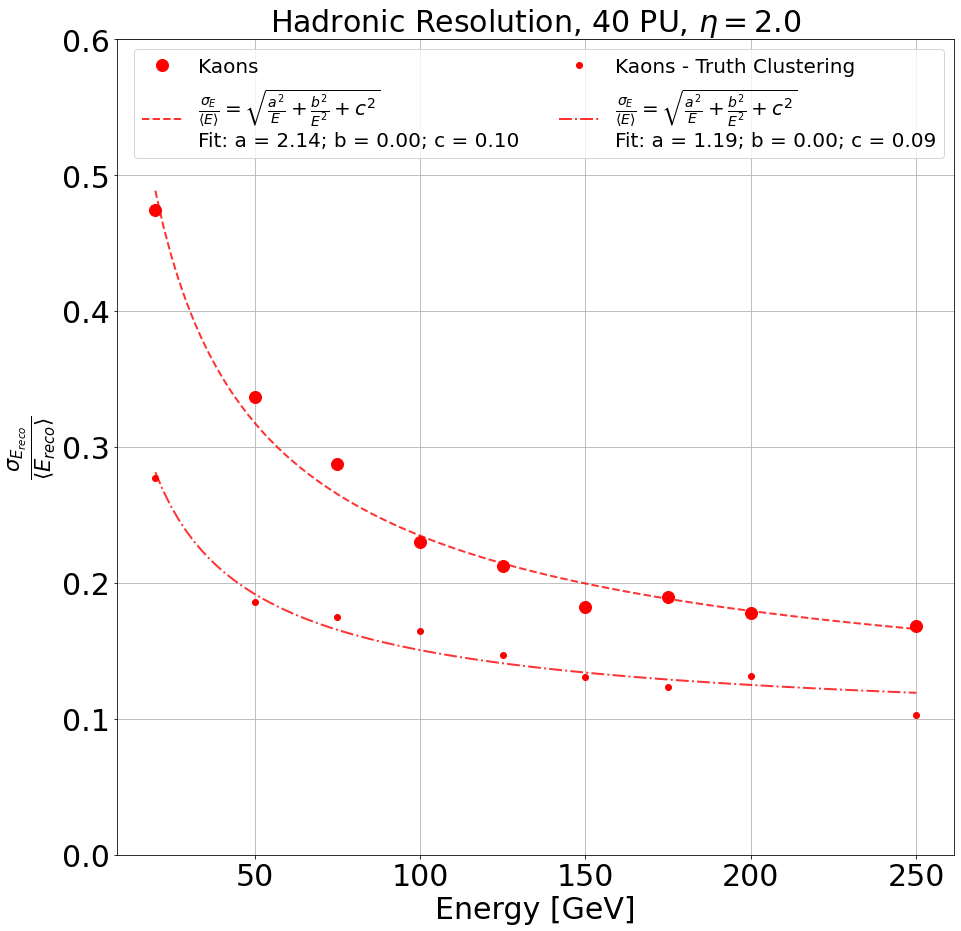

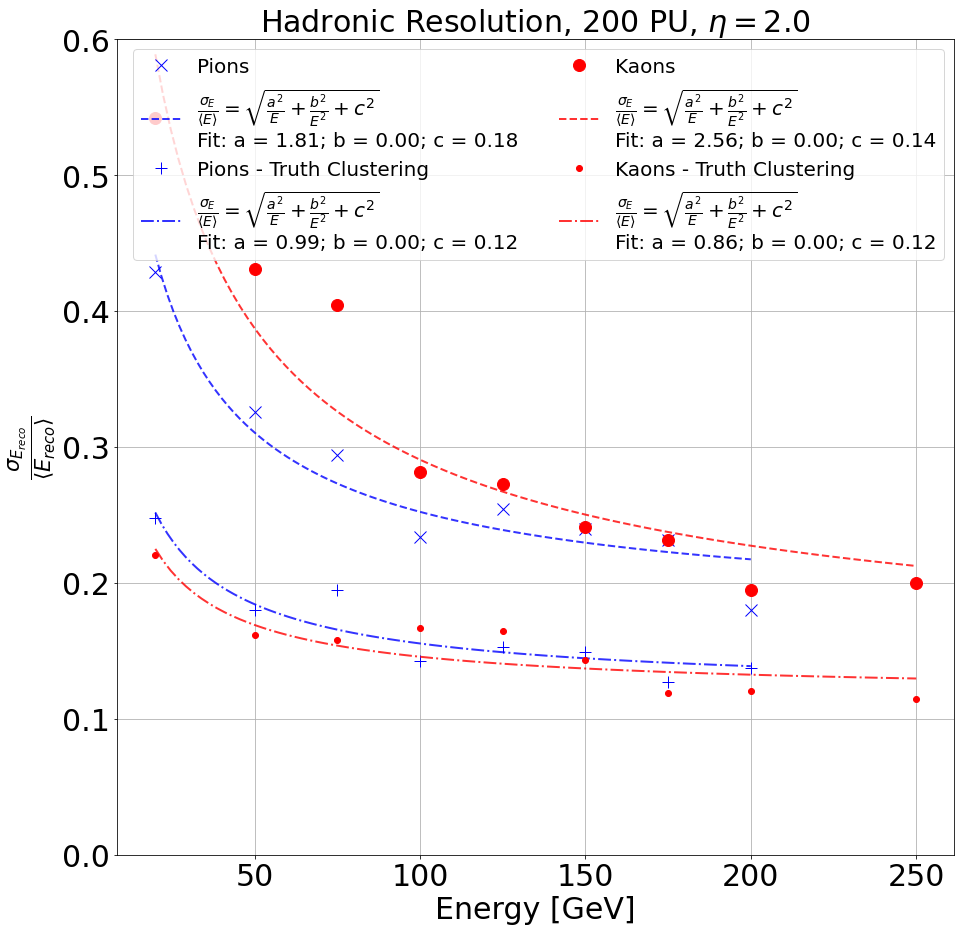

In [256]:
fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=True, pus=[0])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_em_pu0.png')
fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=True, pus=[40])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_em_pu40.png')
fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=True, pus=[200])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_em_pu200.png')

fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=True, pus=[0])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_had_pu0.png')
fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=True, pus=[40])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_had_pu40.png')
fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=True, pus=[200])
fig.savefig('/home/philipp/Software/reveal.js/plots/response_had_pu200.png')

fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=False, pus=[0])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_em_pu0.png')
fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=False, pus=[40])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_em_pu40.png')
fig, ax = response_resolution(pu_summary, EM=True, RESPONSE=False, pus=[200])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_em_pu200.png')

fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=False, pus=[0])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_had_pu0.png')
fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=False, pus=[40])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_had_pu40.png')
fig, ax = response_resolution(pu_summary, EM=False, RESPONSE=False, pus=[200])
fig.savefig('/home/philipp/Software/reveal.js/plots/resolution_had_pu200.png')

